#### 데이터 분석

- 문제 정의 = 마지막 결제 페이지에서 고객 이탈율이 높은 상황(오류는 없음)
- 가설 설정
    - 결제 마지막 페이지에 할인 쿠폰을 제공하여 구매 결정에 걸림돌을 제거해준다면 결제율을 높일 수 있을 것이다.
- 데이터 분석 기본 세팅
- 데이터 분석
    - 같은 기간동안 선착순으로 결제 페이지에 접속한 각 12000명을 대상으로 그릅을 나누어 할인 혜택이 실제 결제율에 얼마나 영향을 주는지 알아 봅시다.
    - 첫번째 그룹 마지막 페이지 결제 접속자 에게 마지막 결제 페이지에 할인 쿠폰을 제공
    - 두번째 그룹 마지막 페이지 결제 접속자 에게 할인 쿠폰 미 제공(정가 구매 유도)
- 분석 결과 시각화
- 최종 결론
    - 문제 해결을 위한 세웠던 가설과 동일하게 할인 적용 신청 그룹의 신청율이 46% 대 20%로 정가 구입 그룹 보다 월등히 높은 것을 확인할 수 있습니다.
    - 따라서, 고객의 구매 장벽을 낮추기 위해 마지막 페이지에 적절한 할인을 제시하는 것이 신규 수강생 모집에 효과적으로 보입니다.

#### 좋은 가설이란?

- 풀고자 하는 문제의 방향성과 일치하는 가설 → 무슨 문제를 풀고자 하는지 명확히 알 것
- 테스트 가능한 가설 → 데이터로 확인이 가능한 가설을 세울 것
- 액션으로 이어질 수 있는 가설 → 가설 검증 후 결과에 따라 특정 액션으로 유도될 수 있을 것

In [3]:
# Pandas 라이브러리 불러오기

import pandas as pd

# 수강생 수강 파일 불러오기

sparta_data = pd.read_table('../Data/user_db1.csv',sep=',')
sparta_data.head()

,user_id,gender,area,age,access_media,group,discounted
0,78ff837c7cea9f33,남,송파구,20,인스타그램,1,10000.0
1,2987aa87d23c9e3d,남,강서구,30,검색,1,30000.0
2,23182525e9996864,남,도봉구,20,인스타그램,1,20000.0
3,ffb6913842d617a5,여,용산구,20,인스타그램,1,20000.0
4,2c6822e7e833dc95,여,은평구,30,네이버,1,30000.0


In [4]:
# 시각화 라이브러리 불러오기

import matplotlib.pyplot as plt
import numpy as np

# 글씨 깨짐방지

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 폰트 설정

plt.rc('font', family='Malgun Gothic')

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [5]:
# 할인을 받아 결제한 사람과, 정가 결제 한 사람의 인원 수 구하기
# ⇒ group이라는 열에서 1인 숫자를 count 즉, 세면 되겠죠!
# sparta_data['group'] ==1 이라는 조건을 두고 그것이 일치하는 user의 수를 세면 됩니다!
# 이때의 ==은 우리가 알고 있는 "equal" = 과 동일한 뜻입니다! (파이선에서 = 는 변수 지정 할때만 쓰입니다. 소곤소곤)
# 할인 혜택 받지 않은 사람의 결제 수

sum_of_students_by_discounted = sparta_data[sparta_data['group']==1]['user_id'].count()
sum_of_students_by_discounted

5654

In [6]:
# 동일한 방법으로 할인혜택을 받지 않는 고객을 sparta_data['group'] ==0 이라는 조건을 두고 그것이 일치하는 user의 수를 세볼까요?
# 이때의 ==은 우리가 알고 있는 "equal" = 과 동일한 뜻입니다!
# 할인 혜택 받은 사람의 결제 수

sum_of_students_by_not_discounted = sparta_data[sparta_data['group']==0]['user_id'].count()
sum_of_students_by_not_discounted

2474

In [7]:
# 각 그룹의 결제 전환율 구하기 
# 각 결제 인원에서 실제 실험 인원인 12000명을 나누고 각 퍼센테이지 구하기

percent_of_students_by_not_discounted = sum_of_students_by_not_discounted/12000 *100
percent_of_students_by_discounted = sum_of_students_by_discounted/12000 *100
print(percent_of_students_by_not_discounted , percent_of_students_by_discounted )

20.616666666666667 47.11666666666667


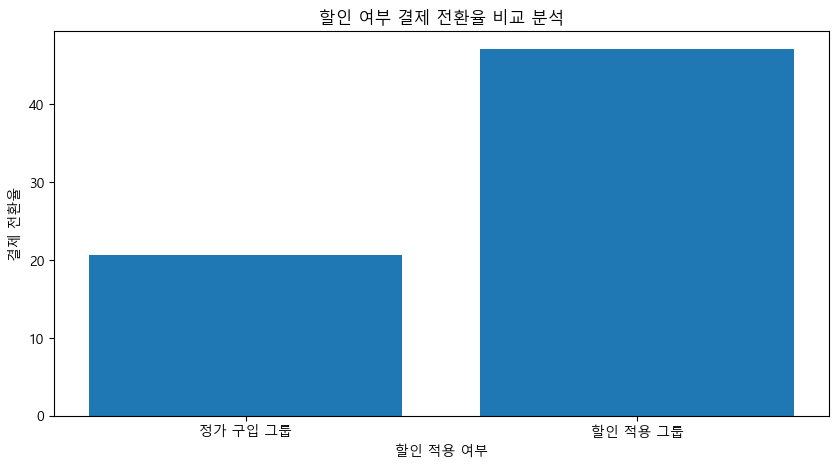

In [8]:
# 바 그래프 그리기
# 그래프 사이즈 

plt.figure(figsize=(10,5))

# x 그룹 지정하기 

x_list =["정가 구입 그룹", "할인 적용 그룹"]

# y 값
# 각각 어떤 값이 들어가야 하는지 입력해 볼까요?

y_list = [percent_of_students_by_not_discounted,percent_of_students_by_discounted]

# x,y값 설정

plt.bar(x_list, y_list)

# 그래프 타이틀

plt.title('할인 여부 결제 전환율 비교 분석')

# x축 레이블

plt.xlabel('할인 적용 여부')

# y축 레이블

plt.ylabel('결제 전환율')

# 그래프 보여주기

plt.show()

In [9]:
# 할인 금액별 결제자 수 구하기

app_users_discounted=sparta_data.groupby('discounted')['user_id'].count()
app_users_discounted

discounted
10000.0     808
20000.0    1588
30000.0    3258
Name: user_id, dtype: int64

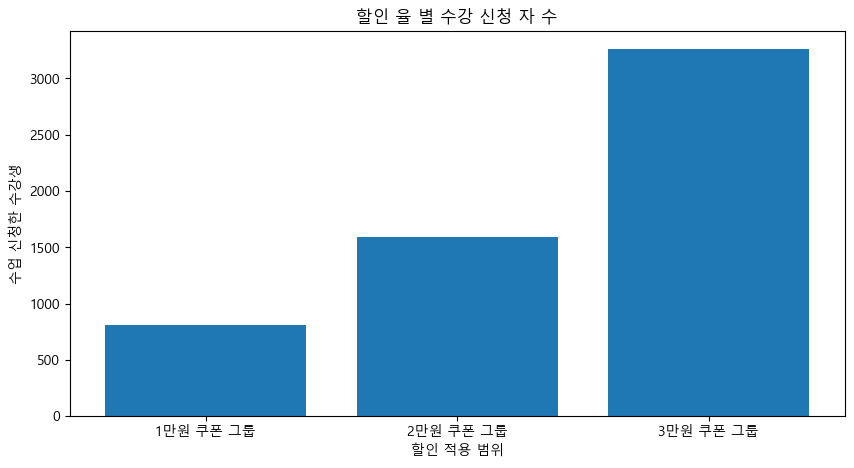

In [10]:
# 그래프 사이즈 

plt.figure(figsize=(10,5))
x_list =["1만원 쿠폰 그룹","2만원 쿠폰 그룹","3만원 쿠폰 그룹"]

# x,y값 설정

plt.bar(x_list, app_users_discounted.values)

# 그래프 타이틀

plt.title('할인 율 별 수강 신청 자 수')

# x축 레이블

plt.xlabel('할인 적용 범위')

# y축 레이블

plt.ylabel('수업 신청한 수강생')

# 그래프 보여주기

plt.show()